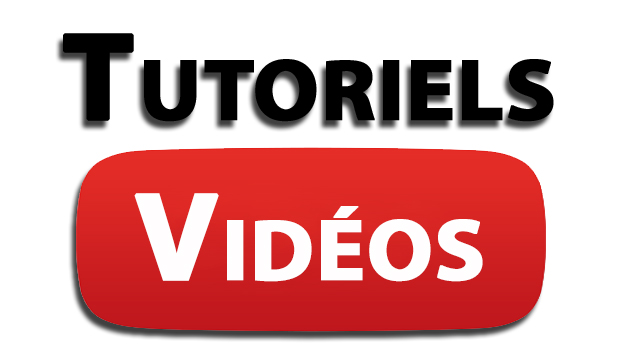

# <font color=green>**REDUCTION DE LA DIMENSION D'UNE ENSEMBLE DE DONNEES PAR L'ANALYSE EN COMPOSANTES PRINCIPALES**

*Auteur : Josué Afouda*


# ***Introduction***

Les ensembles de données à grande dimmension posent de nombreux défis dont :

* **le problème de stockage et des ressources de calcul très coûteux en termes d'analyse** ;

* **le problème de surapprentissage (*overfiting*) dans des tâches de modélisation** ;

* **le fait que certains algorithmes, très utilisés en Machine Learning, ne peuvent pas traiter ce genre de données** ;

* **Corrélation entre différentes variables : problème de multicolinéarité** ;

* Etc.

**Techniques de réduction de dimensionnalité dont l'ACP est la plus populaire**.

# ***Librairies***

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# ***Exercice d'initiation à l'ACP***

On dispose d'un jeu de données de mesures (largeur et longueur) sur les grains de maïs.

In [3]:
# Importation des données
grains_file = '/content/drive/My Drive/TUTORIELS/ACP/seeds-width-vs-length.csv'
grains_df = pd.read_csv(grains_file, header=None, names=['largeur','longueur'])
grains_df

,largeur,longueur
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658
...,...,...
205,2.981,5.137
206,2.795,5.140
207,3.232,5.236
208,2.836,5.175


In [4]:
grains_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   largeur   210 non-null    float64
 1   longueur  210 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB


Calculons le coefficient de corrélation de Pearson des deux variables :

In [5]:
# Création d'un tableau numpy 2D à partir de grains_df
grains_array = grains_df.values
l = grains_array[:, 0]
L = grains_array[:, 1]

# Coefficient de corrélation entre la largeur et la longueur des grains
coef_cor, pvalue = pearsonr(l, L)
print(coef_cor, pvalue)

0.8604149377143466 8.121332906193694e-63


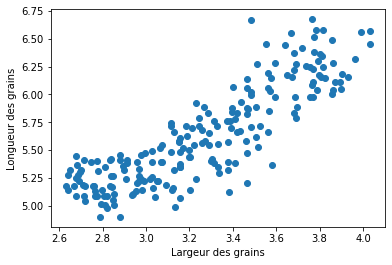

In [6]:
# Visualisation du nuage de points
plt.scatter(l, L)
plt.xlabel('Largeur des grains')
plt.ylabel('Longueur des grains')
plt.show()

Il existe une forte corrélation positive et statistiquement significative entre la largeur et la longueur des grains. Appliquons donc la technique de l'ACP pour décorréler ces variables.

In [7]:
# Création d'une instance de la classe PCA
model_acp = PCA()

# Application du modèle aux données (Entrainement du modèle par les données et transformation des données par le modèle)
grains_acp = model_acp.fit_transform(grains_array)
grains_acp

array([[ 1.37546375e-01,  4.48701536e-02],
       [-9.77931663e-03, -1.04853394e-01],
       [-2.09502378e-01, -2.76013257e-01],
       [-1.57279093e-01, -2.87226133e-01],
       [ 2.16563481e-01, -2.14516232e-01],
       [-1.52413159e-01, -1.96070646e-01],
       [-5.01506254e-02, -4.21863576e-02],
       [-1.32653965e-01, -1.66650003e-01],
       [ 4.58374510e-01,  1.12533346e-01],
       [ 3.53956661e-01, -2.62395364e-02],
       [ 5.51223081e-02,  6.73928808e-02],
       [-1.83358870e-01, -7.74647317e-02],
       [-1.83867947e-01, -7.52873846e-02],
       [-1.80584321e-01, -1.66510665e-02],
       [-2.05119162e-01,  1.75694184e-02],
       [-1.65911373e-01, -2.34590748e-01],
       [-3.12392996e-01, -4.21318181e-01],
       [ 8.51314987e-02, -2.61320442e-01],
       [-1.93203059e-01, -4.30192803e-01],
       [-4.43556277e-01, -9.60472265e-02],
       [-6.01669339e-02,  1.18514214e-01],
       [-1.41381057e-01,  3.22563195e-04],
       [ 1.50648029e-01, -1.97778454e-01],
       [-6.

L'argument *n_components* de la fonction *PCA()* est par défaut égal au nombre de variables de l'ensemble des données. Le résultat de l'application de l'ACP sur les données est un tableau numpy 2D composée de 02 composantes principales. Visualisons ce résultat :

In [8]:
# Première composante principale
comp1 = grains_acp[:,0]


In [9]:
# Deuxième composante principale
comp2 = grains_acp[:,1]


In [10]:
# Calcul du coefficient de corrélation entre comp1 et comp2
coef_cor_comp, pvalue_comp = pearsonr(comp1, comp2)
print(coef_cor_comp, pvalue_comp)


2.5478751053409354e-17 0.999999999999971


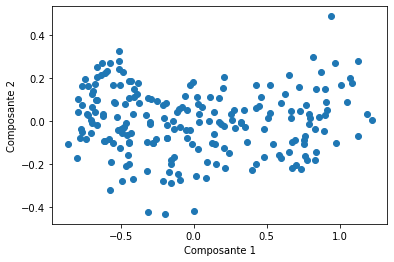

In [11]:
# Nuage de points entre comp1 et comp2
plt.scatter(comp1, comp2)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.show()


Il n'y a pas de corrélation linéaire entre les deux composantes principales. L'ACP transforme les variables corrélées d'un jeu de données en un nouvel ensemble de variables non corrélées.               
Quelle est la variance expliquée par chacune des 02 composantes principales ?

In [12]:
# Attribut du modèle PCA pour retrouver la quantité de variance expliquée par chaque composante
model_acp.explained_variance_


array([0.31595462, 0.02301882])

In [13]:
# Attribut du modèle PCA pour retrouver le pourcentage de variance expliquée par chaque composante
model_acp.explained_variance_ratio_


array([0.93209254, 0.06790746])

In [15]:
# Pour voir le pourcentage de variance qu'on peu expliquer en utilisant un certain nombre de composantes :
model_acp.explained_variance_ratio_.cumsum()


array([0.93209254, 1.        ])

In [16]:
# Attribut du modèle PCA pour retrouver le nombre de composantes principales
model_acp.n_components_


2

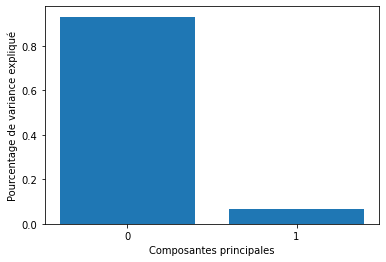

In [18]:
# Visualisation du pourcentage de variance expliquée par chaque composante
plt.bar(range(model_acp.n_components_), model_acp.explained_variance_ratio_)
plt.xlabel('Composantes principales')
plt.ylabel('Pourcentage de variance expliqué')
plt.xticks(range(model_acp.n_components_))
plt.show()

In [19]:
# Attribut pour retrouver les composants principaux au niveau de chaque axe
model_acp.components_

array([[ 0.63910027,  0.76912343],
       [-0.76912343,  0.63910027]])

Le tableau numpy 2D résultant de l'attribut *components_* d'un modèle d'ACP nous indique dans quelle mesure le vecteur de chaque composante principale est affectée par chaque variable originelle.        
Pour cet exercice, on a :    
* **Composante principale 1 = 0.63910027 largeur + 0.76912343 longueur**                
* **Composante principale 2 = -0.76912343 largeur + 0.63910027 longueur**         
Cela peut aider à l'interpétation des composantes principales.

# ***ACP dans un Pipeline***